In [95]:
import pandas as pd
import numpy as np

In [96]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915) 
  
# data (as pandas dataframes) 
X = differentiated_thyroid_cancer_recurrence.data.features 
y = differentiated_thyroid_cancer_recurrence.data.targets 
  
# metadata 
print(differentiated_thyroid_cancer_recurrence.metadata) 
  
# variable information 
print(differentiated_thyroid_cancer_recurrence.variables) 

{'uci_id': 915, 'name': 'Differentiated Thyroid Cancer Recurrence', 'repository_url': 'https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence', 'data_url': 'https://archive.ics.uci.edu/static/public/915/data.csv', 'abstract': 'This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 383, 'num_features': 16, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['Recurred'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2023, 'last_updated': 'Wed Mar 20 2024', 'dataset_doi': '10.24432/C5632J', 'creators': ['Shiva Borzooei', 'Aidin Tarokhian'], 'intro_paper': {'ID': 333, 'type': 'NA

In [97]:
# combine X and y into a single dataframe
df = pd.concat([X, y], axis=1)
df.head().T

,0,1,2,3,4
Age,27,34,30,62,62
Gender,F,F,F,F,F
Smoking,No,No,No,No,No
Hx Smoking,No,Yes,No,No,No
Hx Radiothreapy,No,No,No,No,No
Thyroid Function,Euthyroid,Euthyroid,Euthyroid,Euthyroid,Euthyroid
Physical Examination,Single nodular goiter-left,Multinodular goiter,Single nodular goiter-right,Single nodular goiter-right,Multinodular goiter
Adenopathy,No,No,No,No,No
Pathology,Micropapillary,Micropapillary,Micropapillary,Micropapillary,Micropapillary
Focality,Uni-Focal,Uni-Focal,Uni-Focal,Uni-Focal,Multi-Focal


In [98]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

df = df.rename(columns={'t': 'tumor', 'n': 'node', 'm': 'metastasis'})


strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [99]:
df.head().T

,0,1,2,3,4
age,27,34,30,62,62
gender,f,f,f,f,f
smoking,no,no,no,no,no
hx_smoking,no,yes,no,no,no
hx_radiothreapy,no,no,no,no,no
thyroid_function,euthyroid,euthyroid,euthyroid,euthyroid,euthyroid
physical_examination,single_nodular_goiter-left,multinodular_goiter,single_nodular_goiter-right,single_nodular_goiter-right,multinodular_goiter
adenopathy,no,no,no,no,no
pathology,micropapillary,micropapillary,micropapillary,micropapillary,micropapillary
focality,uni-focal,uni-focal,uni-focal,uni-focal,multi-focal


## EDA

In [100]:
df.info() #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiothreapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  tumor                 383 non-null    object
 12  node                  383 non-null    object
 13  metastasis            383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [101]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[27 34 30 62 52]
65

gender
['f' 'm']
2

smoking
['no' 'yes']
2

hx_smoking
['no' 'yes']
2

hx_radiothreapy
['no' 'yes']
2

thyroid_function
['euthyroid' 'clinical_hyperthyroidism' 'clinical_hypothyroidism'
 'subclinical_hyperthyroidism' 'subclinical_hypothyroidism']
5

physical_examination
['single_nodular_goiter-left' 'multinodular_goiter'
 'single_nodular_goiter-right' 'normal' 'diffuse_goiter']
5

adenopathy
['no' 'right' 'extensive' 'left' 'bilateral']
6

pathology
['micropapillary' 'papillary' 'follicular' 'hurthel_cell']
4

focality
['uni-focal' 'multi-focal']
2

risk
['low' 'intermediate' 'high']
3

tumor
['t1a' 't1b' 't2' 't3a' 't3b']
7

node
['n0' 'n1b' 'n1a']
3

metastasis
['m0' 'm1']
2

stage
['i' 'ii' 'ivb' 'iii' 'iva']
5

response
['indeterminate' 'excellent' 'structural_incomplete'
 'biochemical_incomplete']
4

recurred
['no' 'yes']
2



In [102]:
df.describe(include='all').T #most have little description since they are categorical features

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,383.0,NaN,NaN,NaN,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
gender,383,2,f,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoking,383,2,no,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hx_smoking,383,2,no,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hx_radiothreapy,383,2,no,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thyroid_function,383,5,euthyroid,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
physical_examination,383,5,multinodular_goiter,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adenopathy,383,6,no,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathology,383,4,papillary,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
focality,383,2,uni-focal,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.columns

Index(['age', 'gender', 'smoking', 'hx_smoking', 'hx_radiothreapy',
       'thyroid_function', 'physical_examination', 'adenopathy', 'pathology',
       'focality', 'risk', 'tumor', 'node', 'metastasis', 'stage', 'response',
       'recurred'],
      dtype='object')

In [104]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
categorical = list(df.dtypes[df.dtypes == 'object'].index)
print('Numerical features:', numerical)
print('Categorical features:', categorical)

Numerical features: ['age']
Categorical features: ['gender', 'smoking', 'hx_smoking', 'hx_radiothreapy', 'thyroid_function', 'physical_examination', 'adenopathy', 'pathology', 'focality', 'risk', 'tumor', 'node', 'metastasis', 'stage', 'response', 'recurred']


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Age distribution')

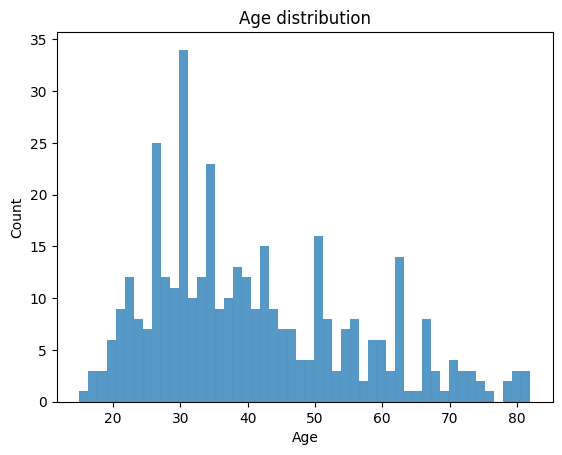

In [106]:
sns.histplot(data=df.age, bins=50, kde=False, linewidth=0.01)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution by recurrence status')

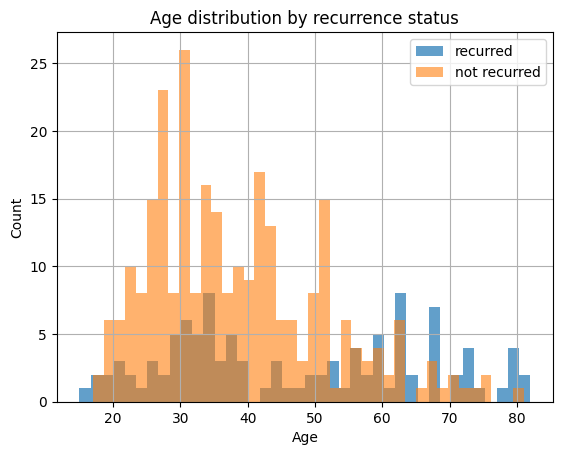

In [107]:
df[df.recurred=='yes'].age.hist(bins=40, alpha=0.7, label='recurred')
df[df.recurred=='no'].age.hist(bins=40, alpha=0.6, label='not recurred')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by recurrence status')

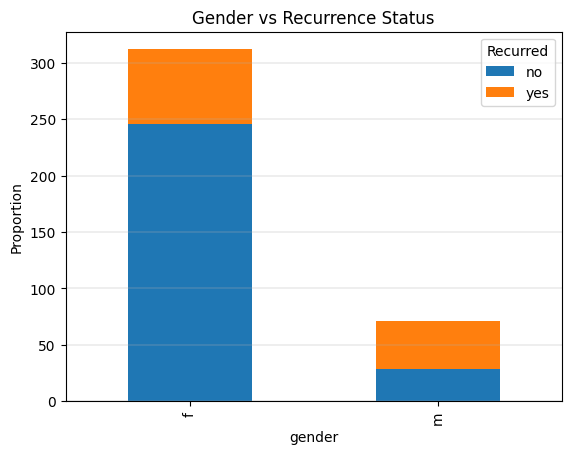

In [108]:
#gender to reccurrence crosstab
pd.crosstab(df.gender, df.recurred).plot(kind='bar', stacked=True)
plt.grid(True, axis='y', linewidth=0.3)
plt.ylabel('Proportion')
plt.title('Gender vs Recurrence Status')
plt.legend(title='Recurred')

#majority of the data is from female patients

In [109]:
df['recurred'] = df['recurred'].replace('yes', 1).replace('no', 0)
global_recurrence = df.recurred.mean()
print(f'Recurrence rate: {global_recurrence:.2%}')

Recurrence rate: 28.20%


/tmp/ipykernel_8649/2307331014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['recurred'] = df['recurred'].replace('yes', 1).replace('no', 0)


In [110]:
recurred_female = df[df.gender == 'f'].recurred.mean()
recurred_male = df[df.gender == 'm'].recurred.mean()
print(f'Female recurrence rate: {recurred_female:.2%}')
print(f'Male recurrence rate: {recurred_male:.2%}')

Female recurrence rate: 21.15%
Male recurrence rate: 59.15%
